In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
amazon_df = pd.read_csv("/content/drive/MyDrive/Data Analysis project/amazon_orders.csv",on_bad_lines='skip')

<ipython-input-15-79870c948e9c>:1: DtypeWarning: Columns (16,17,18,19,22,26,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  amazon_df = pd.read_csv("/content/drive/MyDrive/Data Analysis project/amazon_orders.csv",on_bad_lines='skip')


In [ ]:
amazon_df.head(5)

,amazon_order_id,merchant_order_id,purchase_date,last_updated_date,order_status,fulfillment_channel,sales_channel,order_channel,url,ship_service_level,...,purchase_order_number,price_designation,fulfilled_by,is_iba,is_replacement_order,is_exchange_order,original_order_id,account_id,create_time,update_time
0,171-0003648-9448303,NaN,2023-12-16 06:56:41,2023-12-23 09:46:53,Shipped - Delivered to Buyer,Merchant,Amazon.in,WebsiteOrderChannel,NaN,Standard,...,NaN,NaN,Easy Ship,0.0,0,0,NaN,3.0,2024-01-18 03:04:28,2024-01-18 03:04:28
1,171-0007507-1641150,NaN,2022-11-07 12:21:38,2022-11-14 08:23:39,Shipped - Delivered to Buyer,Merchant,Amazon.in,WebsiteOrderChannel,NaN,Standard,...,NaN,NaN,Easy Ship,0.0,0,0,NaN,4.0,2024-01-18 03:10:56,2024-01-18 03:10:56
2,171-0009886-8466729,NaN,2022-11-20 15:35:45,2022-11-26 05:08:52,Shipped - Delivered to Buyer,Merchant,Amazon.in,WebsiteOrderChannel,NaN,Standard,...,NaN,NaN,Easy Ship,0.0,0,0,NaN,4.0,2024-01-18 03:10:56,2024-01-18 03:10:56
3,171-0012199-2736313,171-0012199-2736313,2024-03-29 12:10:38,2024-03-30 04:42:04,Shipped,Amazon,Amazon.in,NaN,NaN,Expedited,...,NaN,NaN,NaN,0.0,0,0,NaN,3.0,2024-04-13 10:08:25,2024-04-13 10:08:25
4,171-0014290-9993133,NaN,2023-03-17 14:30:17,2023-03-17 19:29:04,Cancelled,Merchant,Amazon.in,WebsiteOrderChannel,NaN,NextDay,...,NaN,NaN,NaN,0.0,0,0,NaN,5.0,2024-01-18 04:17:16,2024-01-18 04:17:16


In [ ]:
amazon_df['purchase_date'] = pd.to_datetime(amazon_df['purchase_date'])
amazon_df['month'] = amazon_df['purchase_date'].dt.month
amazon_df['month'].value_counts().sort_index()

,count
month,
1,2982
2,3570
3,5013
4,4075
5,3909
6,6804
7,3262
8,1941
9,1957


In [ ]:
amazon_df.drop(['amazon_order_id','merchant_order_id','url','asin','is_iba'],axis=1,inplace=True)

In [ ]:
amazon_df

,purchase_date,last_updated_date,order_status,fulfillment_channel,sales_channel,order_channel,ship_service_level,product_name,sku,item_status,...,is_business_order,purchase_order_number,price_designation,fulfilled_by,is_replacement_order,is_exchange_order,original_order_id,account_id,create_time,update_time
0,2023-12-16 06:56:41,2023-12-23 09:46:53,Shipped - Delivered to Buyer,Merchant,Amazon.in,WebsiteOrderChannel,Standard,Furshine Blue Drop Sofa Cover One 3 Seater and...,SOFA_COVER_BLUE_DROP_Pack3+1+1,Shipped,...,0,NaN,NaN,Easy Ship,0,0,NaN,3.0,2024-01-18 03:04:28,2024-01-18 03:04:28
1,2022-11-07 12:21:38,2022-11-14 08:23:39,Shipped - Delivered to Buyer,Merchant,Amazon.in,WebsiteOrderChannel,Standard,Zhola Men's Premium PU-Leather Formal Belt (Co...,PU_BELT_BLA,Shipped,...,0,NaN,NaN,Easy Ship,0,0,NaN,4.0,2024-01-18 03:10:56,2024-01-18 03:10:56
2,2022-11-20 15:35:45,2022-11-26 05:08:52,Shipped - Delivered to Buyer,Merchant,Amazon.in,WebsiteOrderChannel,Standard,Zhola Men's Premium PU-Leather Formal Belt (Co...,PU_BELT_BLA,Shipped,...,0,NaN,NaN,Easy Ship,0,0,NaN,4.0,2024-01-18 03:10:56,2024-01-18 03:10:56
3,2024-03-29 12:10:38,2024-03-30 04:42:04,Shipped,Amazon,Amazon.in,NaN,Expedited,Furshine Blue Diamond Sofa Cover One 3 Seater ...,WC_SOFA_COVER_BLU_DIAMOND_Pack3+1+1,Shipped,...,0,NaN,NaN,NaN,0,0,NaN,3.0,2024-04-13 10:08:25,2024-04-13 10:08:25
4,2023-03-17 14:30:17,2023-03-17 19:29:04,Cancelled,Merchant,Amazon.in,WebsiteOrderChannel,NextDay,Boxn Mosquito Eco Friendly Electronic LED Mosq...,MOSQUITO_KILLER_LAMP_BLACK,NaN,...,Easy Ship,NaN,NaN,NaN,0,0,NaN,5.0,2024-01-18 04:17:16,2024-01-18 04:17:16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46287,2023-10-12 06:11:03,2023-10-22 15:00:12,Shipped,Amazon,Non-Amazon,NaN,Standard,-,PL1051_Pack2_11-12_FBA,Unshipped,...,0,NaN,NaN,NaN,0.0,0.0,NaN,4.0,2024-01-18 04:07:35,2024-01-18 04:07:35
46288,2024-02-26 06:17:11,2024-02-26 06:37:31,Cancelled,Amazon,Non-Amazon,NaN,Standard,-,MFN_SOFA_COVER_BLUE_DROP_Pack3+1+1,Unshipped,...,0,NaN,NaN,NaN,0.0,0.0,NaN,3.0,2024-02-27 06:28:43,2024-02-27 06:28:43
46289,2024-03-22 17:48:21,2024-03-28 04:16:13,Shipped,Amazon,Non-Amazon,NaN,Standard,-,WC_SOFA_COVER_BLEND_GEOMETRIC_Pack3+1+1,Unshipped,...,0,NaN,NaN,NaN,0.0,0.0,NaN,3.0,2024-04-13 10:09:01,2024-04-13 10:09:01
46290,2023-10-12 06:36:21,2023-10-23 11:09:14,Shipped,Amazon,Non-Amazon,NaN,Standard,-,PL1212B_Pack1-19_fba,Unshipped,...,0,NaN,NaN,NaN,0.0,0.0,NaN,4.0,2024-01-18 04:07:35,2024-01-18 04:07:35


In [ ]:
amazon_df['purchase_date'] =pd.to_datetime(amazon_df['purchase_date'])

In [ ]:
amazon_df['hour'] = amazon_df['purchase_date'].dt.hour
dfi = pd.DataFrame(amazon_df['hour'].value_counts().sort_index())

In [ ]:
with pd.ExcelWriter('/content/drive/MyDrive/Data Analysis project/amazon_data.xlsx') as writer:
    amazon_df.to_excel(writer, index=False)

HourWise Distribution


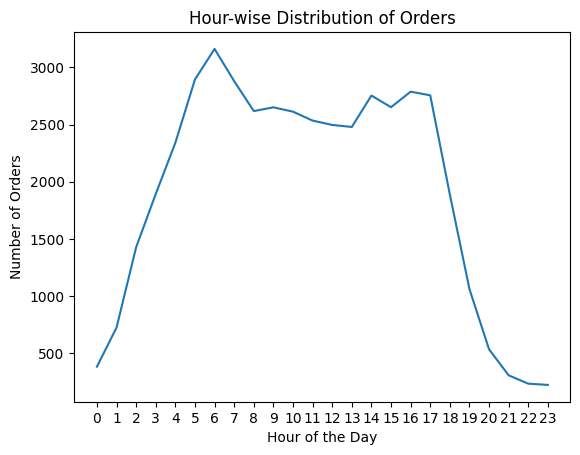

In [ ]:
#creating dataset
hours = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
orders = [382, 724, 1427, 1893, 2341, 2895, 3162, 2880, 2618, 2651, 2613, 2535, 2497, 2479, 2754, 2652, 2788, 2756, 1889, 1061, 534, 306, 233, 222]

plt.plot(hours, orders)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.title('Hour-wise Distribution of Orders')
plt.xticks(range(24))
plt.show()

In [ ]:
amazon_df['order_status'].value_counts().head(4)

,count
order_status,
Shipped,21871
Shipped - Delivered to Buyer,15376
Cancelled,7109
Shipped - Returned to Seller,1668


In [ ]:
amazon_df['fulfillment_channel'].value_counts()

,count
fulfillment_channel,
Amazon,25004
Merchant,21288


In [ ]:
exp_amazon = amazon_df[amazon_df['ship_service_level']=='Expedited']
std_amazon = amazon_df[amazon_df['ship_service_level']=='Standard']
print(exp_amazon['item_status'].value_counts().head(3))
print(std_amazon['item_status'].value_counts().head(3))

item_status
Shipped      20190
Cancelled     2860
Unshipped      578
Name: count, dtype: int64
item_status
Shipped      17006
Unshipped      904
Cancelled       78
Name: count, dtype: int64


In [ ]:
std_amazon

,purchase_date,last_updated_date,order_status,fulfillment_channel,sales_channel,order_channel,ship_service_level,product_name,sku,item_status,...,purchase_order_number,price_designation,fulfilled_by,is_replacement_order,is_exchange_order,original_order_id,account_id,create_time,update_time,hour
0,2023-12-16 06:56:41,2023-12-23 09:46:53,Shipped - Delivered to Buyer,Merchant,Amazon.in,WebsiteOrderChannel,Standard,Furshine Blue Drop Sofa Cover One 3 Seater and...,SOFA_COVER_BLUE_DROP_Pack3+1+1,Shipped,...,NaN,NaN,Easy Ship,0,0,NaN,3.0,2024-01-18 03:04:28,2024-01-18 03:04:28,6
1,2022-11-07 12:21:38,2022-11-14 08:23:39,Shipped - Delivered to Buyer,Merchant,Amazon.in,WebsiteOrderChannel,Standard,Zhola Men's Premium PU-Leather Formal Belt (Co...,PU_BELT_BLA,Shipped,...,NaN,NaN,Easy Ship,0,0,NaN,4.0,2024-01-18 03:10:56,2024-01-18 03:10:56,12
2,2022-11-20 15:35:45,2022-11-26 05:08:52,Shipped - Delivered to Buyer,Merchant,Amazon.in,WebsiteOrderChannel,Standard,Zhola Men's Premium PU-Leather Formal Belt (Co...,PU_BELT_BLA,Shipped,...,NaN,NaN,Easy Ship,0,0,NaN,4.0,2024-01-18 03:10:56,2024-01-18 03:10:56,15
6,2021-12-09 14:42:40,2021-12-15 12:31:22,Shipped - Delivered to Buyer,Merchant,Amazon.in,WebsiteOrderChannel,Standard,Green Mask Stick,PL107G (Pack of 1),Shipped,...,NaN,NaN,Easy Ship,0,0,0.0,4.0,2024-01-18 03:10:56,2024-01-18 03:10:56,14
7,2022-01-25 08:05:48,2022-01-25 20:18:35,Cancelled,Merchant,Amazon.in,WebsiteOrderChannel,Standard,Green Mask Stick,PL107G (Pack of 1),NaN,...,NaN,NaN,NaN,0,0,NaN,4.0,2024-01-18 03:10:56,2024-01-18 03:10:56,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46287,2023-10-12 06:11:03,2023-10-22 15:00:12,Shipped,Amazon,Non-Amazon,NaN,Standard,-,PL1051_Pack2_11-12_FBA,Unshipped,...,NaN,NaN,NaN,0.0,0.0,NaN,4.0,2024-01-18 04:07:35,2024-01-18 04:07:35,6
46288,2024-02-26 06:17:11,2024-02-26 06:37:31,Cancelled,Amazon,Non-Amazon,NaN,Standard,-,MFN_SOFA_COVER_BLUE_DROP_Pack3+1+1,Unshipped,...,NaN,NaN,NaN,0.0,0.0,NaN,3.0,2024-02-27 06:28:43,2024-02-27 06:28:43,6
46289,2024-03-22 17:48:21,2024-03-28 04:16:13,Shipped,Amazon,Non-Amazon,NaN,Standard,-,WC_SOFA_COVER_BLEND_GEOMETRIC_Pack3+1+1,Unshipped,...,NaN,NaN,NaN,0.0,0.0,NaN,3.0,2024-04-13 10:09:01,2024-04-13 10:09:01,17
46290,2023-10-12 06:36:21,2023-10-23 11:09:14,Shipped,Amazon,Non-Amazon,NaN,Standard,-,PL1212B_Pack1-19_fba,Unshipped,...,NaN,NaN,NaN,0.0,0.0,NaN,4.0,2024-01-18 04:07:35,2024-01-18 04:07:35,6


In [ ]:
amazon_df['item_status'].value_counts().head(3)

,count
item_status,
Shipped,38395
Cancelled,2938
Unshipped,1482


In [ ]:
cancel_amazon = amazon_df[amazon_df['order_status']=='Cancelled']
shipped_amazon = amazon_df[amazon_df['order_status']=='Shipped']

In [ ]:
pincode_df = pd.read_csv("/content/drive/MyDrive/Data Analysis project/pincode.csv")

In [ ]:
amazon_df = amazon_df.rename(columns={'ship_postal_code': 'pincode'})

In [ ]:

amazon_df = amazon_df.dropna(subset=['pincode'])
amazon_df['pincode'] = pd.to_numeric(amazon_df['pincode'], errors='coerce')

In [ ]:
pincode_df['pincode'].dtype

dtype('int64')

In [ ]:
merged_df = pd.merge(amazon_df,pincode_df, on='pincode',how='left')

In [ ]:
merged_df

,purchase_date,last_updated_date,order_status,fulfillment_channel,sales_channel,order_channel,ship_service_level,product_name,sku,item_status,...,fulfilled_by,is_replacement_order,is_exchange_order,original_order_id,account_id,create_time,update_time,hour,officename,statename
0,2023-12-16 06:56:41,2023-12-23 09:46:53,Shipped - Delivered to Buyer,Merchant,Amazon.in,WebsiteOrderChannel,Standard,Furshine Blue Drop Sofa Cover One 3 Seater and...,SOFA_COVER_BLUE_DROP_Pack3+1+1,Shipped,...,Easy Ship,0,0,NaN,3.0,2024-01-18 03:04:28,2024-01-18 03:04:28,6,Arpora B.O,GOA
1,2023-12-16 06:56:41,2023-12-23 09:46:53,Shipped - Delivered to Buyer,Merchant,Amazon.in,WebsiteOrderChannel,Standard,Furshine Blue Drop Sofa Cover One 3 Seater and...,SOFA_COVER_BLUE_DROP_Pack3+1+1,Shipped,...,Easy Ship,0,0,NaN,3.0,2024-01-18 03:04:28,2024-01-18 03:04:28,6,Baga B.O,GOA
2,2023-12-16 06:56:41,2023-12-23 09:46:53,Shipped - Delivered to Buyer,Merchant,Amazon.in,WebsiteOrderChannel,Standard,Furshine Blue Drop Sofa Cover One 3 Seater and...,SOFA_COVER_BLUE_DROP_Pack3+1+1,Shipped,...,Easy Ship,0,0,NaN,3.0,2024-01-18 03:04:28,2024-01-18 03:04:28,6,Calangute S.O,GOA
3,2022-11-07 12:21:38,2022-11-14 08:23:39,Shipped - Delivered to Buyer,Merchant,Amazon.in,WebsiteOrderChannel,Standard,Zhola Men's Premium PU-Leather Formal Belt (Co...,PU_BELT_BLA,Shipped,...,Easy Ship,0,0,NaN,4.0,2024-01-18 03:10:56,2024-01-18 03:10:56,12,Arapyi B.O,MANIPUR
4,2022-11-07 12:21:38,2022-11-14 08:23:39,Shipped - Delivered to Buyer,Merchant,Amazon.in,WebsiteOrderChannel,Standard,Zhola Men's Premium PU-Leather Formal Belt (Co...,PU_BELT_BLA,Shipped,...,Easy Ship,0,0,NaN,4.0,2024-01-18 03:10:56,2024-01-18 03:10:56,12,Chajing Pt II B.O,MANIPUR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370053,2024-02-26 06:11:43,2024-02-26 06:31:57,Cancelled,Amazon,Non-Amazon,NaN,Standard,-,WC_SOFA_COVER_BLU_DIAMOND_Pack3+1+1,Unshipped,...,NaN,0.0,0.0,NaN,3.0,2024-02-27 06:28:43,2024-02-27 06:28:43,6,Nangloi - III S.O,DELHI
370054,2024-02-26 06:11:43,2024-02-26 06:31:57,Cancelled,Amazon,Non-Amazon,NaN,Standard,-,WC_SOFA_COVER_BLU_DIAMOND_Pack3+1+1,Unshipped,...,NaN,0.0,0.0,NaN,3.0,2024-02-27 06:28:43,2024-02-27 06:28:43,6,Nangloi S.O,DELHI
370055,2024-02-26 06:11:43,2024-02-26 06:31:57,Cancelled,Amazon,Non-Amazon,NaN,Standard,-,WC_SOFA_COVER_BLU_DIAMOND_Pack3+1+1,Unshipped,...,NaN,0.0,0.0,NaN,3.0,2024-02-27 06:28:43,2024-02-27 06:28:43,6,Nilothi B.O,DELHI
370056,2024-02-26 06:11:43,2024-02-26 06:31:57,Cancelled,Amazon,Non-Amazon,NaN,Standard,-,WC_SOFA_COVER_BLU_DIAMOND_Pack3+1+1,Unshipped,...,NaN,0.0,0.0,NaN,3.0,2024-02-27 06:28:43,2024-02-27 06:28:43,6,Ranhola B.O,DELHI


In [ ]:
amaz_df = merged_df

In [ ]:
amaz_df['statename'].value_counts().head(10)


,count
statename,
UTTAR PRADESH,75256
DELHI,29243
MAHARASHTRA,27380
RAJASTHAN,25031
HARYANA,19488
BIHAR,19352
TAMIL NADU,18172
KARNATAKA,17937
TELANGANA,17929


In [ ]:
amaz_df['item_price'] = amaz_df['item_price'].fillna(0)

In [ ]:
amaz_df['item_price'] = amaz_df['item_price'].astype(float)

In [ ]:
state_sums = pd.DataFrame(amaz_df.groupby('statename')['item_price'].sum()).sort_values('item_price',ascending=False)
state_sums

,item_price
statename,
UTTAR PRADESH,90009621.88
MAHARASHTRA,30763730.91
TAMIL NADU,27318879.51
RAJASTHAN,26505340.74
TELANGANA,26474075.00
BIHAR,26221722.81
ANDHRA PRADESH,25740306.65
KARNATAKA,22800810.57
HARYANA,19723991.63


In [ ]:
dfi4 = state_sums.head(10)
with pd.ExcelWriter('/content/drive/MyDrive/Data Analysis project/statewiseprice.xlsx') as writer:
    dfi4.to_excel(writer, index=False)

In [ ]:
import pandas as pd

# Assuming your ecommerce dataset is stored in a pandas dataframe called 'df'
# and it has columns 'statename', 'order_status' (with values 'cancelled' or 'not cancelled')

# Filter the dataframe to only include cancelled orders
cancelled_orders = amaz_df[amaz_df['order_status'] == 'Cancelled']

# Group the cancelled orders by state and count the number of cancelled orders
cancelled_counts = cancelled_orders.groupby('statename')['order_status'].count()

# Group the original dataframe by state and count the total number of orders
total_orders = amaz_df.groupby('statename')['order_status'].count()

# Calculate the cancellation rate by dividing the number of cancelled orders by the total number of orders
cancellation_rate = (cancelled_counts / total_orders) * 100

In [ ]:
cancellation_rate.sort_values(ascending=False)

,order_status
statename,
JAMMU & KASHMIR,28.941418
MIZORAM,25.522388
TRIPURA,23.979592
MANIPUR,23.185613
BIHAR,21.971889
RAJASTHAN,21.189725
JHARKHAND,18.396801
WEST BENGAL,17.980888
PUNJAB,17.686144


In [ ]:
dfi5 = pd.DataFrame(cancellation_rate.sort_values(ascending=False))
with pd.ExcelWriter('/content/drive/MyDrive/Data Analysis project/cancellation.xlsx') as writer:
    dfi5.to_excel(writer, index=False)

In [ ]:
amaz_df['item_tax'] = pd.to_numeric(amaz_df['item_tax'], errors='coerce')
amaz_df['item_price'] = pd.to_numeric(amaz_df['item_price'],errors = 'coerce')

In [ ]:
amaz_df['tax_percentage'] = amaz_df['item_tax']/amaz_df['item_price']*100

In [ ]:
pd.to_datetime(amaz_df['last_updated_date'])

,last_updated_date
0,2023-12-23 09:46:53
1,2023-12-23 09:46:53
2,2023-12-23 09:46:53
3,2022-11-14 08:23:39
4,2022-11-14 08:23:39
...,...
370053,2024-02-26 06:31:57
370054,2024-02-26 06:31:57
370055,2024-02-26 06:31:57
370056,2024-02-26 06:31:57


In [ ]:
cancelled_df = amaz_df[amaz_df['order_status'] == 'Cancelled']
non_cancelled_df = amaz_df[amaz_df['order_status'] != 'Cancelled']
print(cancelled_df['tax_percentage'].mean())
print(non_cancelled_df['tax_percentage'].mean())

10.711996130401673
6.481844003965599


In [ ]:
amaz_df['year'] = amaz_df['purchase_date'].dt.year
amaz_df['month'] = amaz_df['purchase_date'].dt.month


In [ ]:
yearly_orders = amaz_df.groupby('year')['sku'].count()

In [ ]:
yearly_orders

,sku
year,
2021,19665
2022,132115
2023,112942
2024,105336


In [ ]:
yearly_revenue = amaz_df.groupby('year')['item_price'].sum()

In [ ]:
print(yearly_revenue)

year
2021    5.707331e+06
2022    9.031880e+07
2023    1.348313e+08
2024    1.972198e+08
Name: item_price, dtype: float64


In [ ]:
cancelled_orders = amaz_df[amaz_df['order_status'] == 'Cancelled']
cancelled_orders_yearly = cancelled_orders.groupby('year')['order_status'].count()


total_orders_yearly = amaz_df.groupby('year')['order_status'].count()

# Calculate the year-wise cancellation rate
yearly_cancellation_rate = (cancelled_orders_yearly / total_orders_yearly) * 100

# Print the year-wise cancellation rate
print("Year-wise Cancellation Rate:")
print(yearly_cancellation_rate)

Year-wise Cancellation Rate:
year
2021    20.274600
2022    19.921281
2023    14.418905
2024    14.040784
Name: order_status, dtype: float64


In [ ]:
amaz_df['last_updated_date'] = pd.to_datetime(amaz_df['last_updated_date'])

In [ ]:
amaz_df['delivery_time'] = amaz_df['last_updated_date'] - amaz_df['purchase_date']

In [ ]:
amaz_df['delivery_time'] = amaz_df['last_updated_date'] - amaz_df['purchase_date']

In [ ]:
print(can_avg_delivery_time)
print(non_can_avg_delivery_time)

NameError: name 'can_avg_delivery_time' is not defined

In [ ]:
dfi6 = pd.DataFrame(amaz_df['month'].value_counts()).sort_index()
with pd.ExcelWriter('/content/drive/MyDrive/Data Analysis project/monthlys.xlsx') as writer:
    dfi6.to_excel(writer, index=False)

In [ ]:
dfi6.sort_index()

In [ ]:
stylus_sales = amazon_df.groupby('sku')['quantity'].sum().loc[lambda x: x.index.str.contains('stylus', case=False)].sort_values(ascending = False)

In [ ]:
for sku, code in stylus_sales.items():
    count_ones = code.count('1')
    print(f"{sku}: {count_ones} ones")

In [ ]:
non_promotion_df = amaz_df[amaz_df['promotion_ids'].isnull()]
promotion_df = amaz_df[amaz_df['promotion_ids'].notna()]

Cancellation_rate_without_promotion = non_promotion_df[non_promotion_df['order_status'] == 'Cancelled'].shape[0] / non_promotion_df.shape[0]
Cancellation_rate_with_promotion = promotion_df[promotion_df['order_status'] == 'Cancelled'].shape[0] / promotion_df.shape[0]

print("Cancellation rate whithout any promotion", Cancellation_rate_without_promotion)
print("Cancellation rate with Promotion", Cancellation_rate_with_promotion)

Cancellation rate whithout any promotion 0.29793468933993167
Cancellation rate with Promotion 0.03341650474401788


**Flipkart Data Analysis**

In [ ]:
import pandas as pd

In [ ]:
flip_df = pd.read_csv("/content/drive/MyDrive/Data Analysis project/Flipkart_orders.csv")

<ipython-input-23-a47b3df750fa>:1: DtypeWarning: Columns (24,31) have mixed types. Specify dtype option on import or set low_memory=False.
  flip_df = pd.read_csv("/content/drive/MyDrive/Data Analysis project/Flipkart_orders.csv")


In [ ]:
flip_df

,order_item_id,order_id,fulfilment_source,fulfilment_type,order_date,order_approval_date,order_item_status,sku,fsn,product_title,...,deliver_by_date,order_delivery_date,delivery_sla_breached,order_service_completion_date,service_by_date,service_completion_sla,service_sla_breached,account_id,create_time,update_time
0,OI:12560191039333800,OD125601910393338000,Seller,NON_FBF,2022-07-30 00:00:00,2022-07-30 00:00:00,DELIVERED,STYLUS_PEN,"STSGGHS2XG5RNZHR""""""",Kingone Upgraded Stylus Pen iPad Pencil Ultra ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2024-01-25 10:31:49,2024-01-25 10:31:49
1,OI:12560502154330800,OD125605021543308000,Seller,NON_FBF,2022-07-30 00:00:00,2022-07-30 00:00:00,DELIVERED,STYLUS_PEN,"STSGGHS2XG5RNZHR""""""",Kingone Upgraded Stylus Pen iPad Pencil Ultra ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2024-01-25 10:31:51,2024-01-25 10:31:51
2,OI:12560502154330801,OD125605021543308000,Seller,NON_FBF,2022-08-05 00:00:00,2022-08-05 00:00:00,RETURNED,STYLUS_PEN,"STSGGHS2XG5RNZHR""""""",Kingone Upgraded Stylus Pen iPad Pencil Ultra ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2024-01-25 10:31:51,2024-01-25 10:31:51
3,OI:12561169342802700,OD125611693428027000,Seller,NON_FBF,2022-07-31 00:00:00,2022-07-31 00:00:00,DELIVERED,STYLUS_PEN_BLACK,"STSGGZFCFY2TX4GF""""""",Kingone Upgraded Stylus Pen iPad Pencil Ultra ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2024-01-25 10:30:18,2024-01-25 10:30:18
4,OI:12561404691585900,OD125614046915859000,Seller,NON_FBF,2022-07-31 00:00:00,2022-07-31 00:00:00,DELIVERED,STYLUS_PEN,"STSGGHS2XG5RNZHR""""""",Kingone Upgraded Stylus Pen iPad Pencil Ultra ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2024-01-25 10:31:48,2024-01-25 10:31:48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83662,OI:431593359251349100,OD431593359251349100,Seller,NON_FBF,2024-06-22 23:14:00,2024-06-22 23:17:00,APPROVED,ZL1011-17,LSKFH5752U7YUAS8,ZODAK Retro Matte Lipstick - Cheek Sweet Pink ...,...,2024-06-27 00:00:00,NaN,N,NaN,NaN,NaN,NaN,2,2024-06-24 07:57:56,2024-06-24 07:57:56
83663,OI:431593455363961100,OD431593455363961100,ulub_bts,FBF,2024-06-22 23:30:00,2024-06-22 23:32:00,APPROVED,SOFA_COVER_BLEND_GEOMETRIC_Pack3+1+1,SLIGUNMQGNRFZ7DE,FurShine Polyester Abstract Sofa Cover Orange ...,...,2024-06-25 00:00:00,NaN,N,NaN,NaN,NaN,NaN,2,2024-06-24 07:57:56,2024-06-24 07:57:56
83664,OI:431593459191908100,OD431593459191908100,gur_san_wh_nl_01nl,FBF,2024-06-22 23:31:00,2024-06-22 23:34:00,APPROVED,Stylus_ID713_White,STSG3WVHCHDXNCWE,Flipkart SmartBuy Upgraded Stylus Pen Ultra H...,...,2024-06-23 00:00:00,NaN,N,NaN,NaN,NaN,NaN,2,2024-06-24 07:57:56,2024-06-24 07:57:56
83665,OI:431593466601323100,OD431593466601323100,Seller,NON_FBF,2024-06-22 23:32:00,2024-06-22 23:33:00,APPROVED,BB_TRIPLE_SOFA_COVER_BLUE_DIAMOND,SLIHY8FSHMXQXFXE,B BESTILO Polyester Geometric Sofa Cover Blue ...,...,2024-06-25 00:00:00,NaN,N,NaN,NaN,NaN,NaN,2,2024-06-24 07:57:56,2024-06-24 07:57:56


In [ ]:
flip_df['order_date'] = pd.to_datetime(flip_df['order_date'])
flip_df['hour'] = flip_df['order_date'].dt.hour
flip_df['hour'].value_counts().sort_index()

,count
hour,
0,5206
1,1775
2,959
3,459
4,409
5,505
6,1003
7,1987
8,3010


In [ ]:
flip_df['fulfilment_source'].value_counts()

,count
fulfilment_source,
Seller,49823
gur_san_wh_nl_01nl,12924
malur_bts,9046
ulub_bts,8310
bhi_vas_wh_nl_01nl,3512


In [ ]:
flip_df['fulfilment_type'].value_counts()

,count
fulfilment_type,
NON_FBF,49823
FBF,33844


In [ ]:
flip_df['order_item_status'].value_counts().head(3)

,count
order_item_status,
DELIVERED,49928
RETURNED,24009
CANCELLED,8395


In [ ]:
stylus_sales = flip_df.groupby('sku')['order_quantity'].sum().loc[lambda x: x.index.str.contains('stylus', case=False)].sort_values(ascending = False)

In [ ]:
stylus_sales.head(10)

,order_quantity
sku,
STYLUS_WHI,9495
STYLUS_PEN,7786
Stylus_ID713_White,6850
FSB-Stylus-Map,6398
Stylus Black,4579
Stylus_ID713_Black,3712
STYLUS_PEN_BLACK,2945
Stylus_Pen_P8,2460
FS-StylusPen-2W-Black,2194


In [ ]:
flip_df['order_date'] = pd.to_datetime(flip_df['order_date'])

In [ ]:
flip_df['year'] = flip_df['order_date'].dt.year
flip_df['month'] = flip_df['order_date'].dt.month
flip_df['hour'] = flip_df['order_date'].dt.hour
flip_df['date'] = flip_df['order_date'].dt.date

In [ ]:
flip_df['year'].value_counts()

,count
year,
2023,53084
2024,28903
2022,1680


In [ ]:
year23_df = flip_df[flip_df['year'] == 2023]

In [ ]:
year23_df['month'].value_counts().sort_index()


,count
month,
1,1691
2,2742
3,3699
4,3425
5,3027
6,3607
7,3805
8,4942
9,4370


In [ ]:
dfi6 = flip_df['hour'].value_counts().sort_index()

In [ ]:
dfi6

,count
hour,
0,5206
1,1775
2,959
3,459
4,409
5,505
6,1003
7,1987
8,3010


In [ ]:
flip_df['order_cancellation_date'] = pd.to_datetime(flip_df['order_cancellation_date'])

In [ ]:
cancelled_dff = flip_df[flip_df['order_item_status'] == 'CANCELLED']

In [ ]:
cancelled_dff['cancel_perid'] = cancelled_dff['order_cancellation_date']-cancelled_dff['order_date']

<ipython-input-66-4b70aee5b842>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancelled_dff['cancel_perid'] = cancelled_dff['order_cancellation_date']-cancelled_dff['order_date']


In [ ]:
cancelled_dff['cancel_perid'].mean()

Timedelta('0 days 10:35:49.489934484')

In [ ]:
flip_df['date'] = flip_df['order_date'].dt.date

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
returned_df = flip_df[flip_df['order_return_approval_date'] != 'NULL']

In [ ]:
returned_df['month'].value_counts().sort_index()

,count
month,
1,8108
2,7863
3,9144
4,7314
5,7631
6,7034
7,3814
8,5088
9,4702


In [ ]:
cancelled_df = flip_df[flip_df['order_item_status'] == 'CANCELLED']

In [ ]:
cancelled_df['month'].value_counts().sort_index()

,count
month,
1,713
2,665
3,845
4,700
5,754
6,698
7,410
8,599
9,524
